In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

from helper import load_dic_file, extract_displacement_jump

In [2]:
# Load all files
file_pattern = "DIC_Data/Tangential/R1_CAFS13_DICResults/B*.txt"
files = sorted(glob.glob(file_pattern))
files[:5]

['DIC_Data/Tangential/R1_CAFS13_DICResults/B00001.txt',
 'DIC_Data/Tangential/R1_CAFS13_DICResults/B00002.txt',
 'DIC_Data/Tangential/R1_CAFS13_DICResults/B00003.txt',
 'DIC_Data/Tangential/R1_CAFS13_DICResults/B00004.txt',
 'DIC_Data/Tangential/R1_CAFS13_DICResults/B00005.txt']

In [ ]:
loadings_df = pd.read_excel("DIC_Data/Normal/R1_CAFS13/R1_Loading_SumDiff/CAFS13_NormalLoading.xlsx").drop(columns=1.00)
loadings_df = loadings_df.rename({0.17: "Loading"}, axis=1)
Loadings = list(loadings_df["Loading"])

In [4]:
displacement_jumps = []
for i, file in enumerate(files):
    df = load_dic_file(file)
    delta_v = extract_displacement_jump(df)
    displacement_jumps.append(delta_v)

displacement_jumps[:5]

[np.float64(0.052166457888417284),
 np.float64(0.07065482593557004),
 np.float64(0.06937443234249896),
 np.float64(0.09441991833936814),
 np.float64(0.14770531343051108)]

In [9]:
data1 = pd.read_csv('DIC_Data/Tangential/R1_CAFS13_DICResults/CAFS0013_load.lvm', delim_whitespace=True, header=None, names=['Timestamp', 'TangDisplacement', 'Load'])
Loadings = list(data1["Load"])

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_37342/597593696.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data1 = pd.read_csv('DIC_Data/Tangential/R1_CAFS13_DICResults/CAFS0013_load.lvm', delim_whitespace=True, header=None, names=['Timestamp', 'TangDisplacement', 'Load'])


In [10]:
# Create DataFrame for plotting
data = pd.DataFrame({
    'Applied Load (N)': Loadings[:len(displacement_jumps)],
    'Displacement Jump (pixels)': displacement_jumps
})



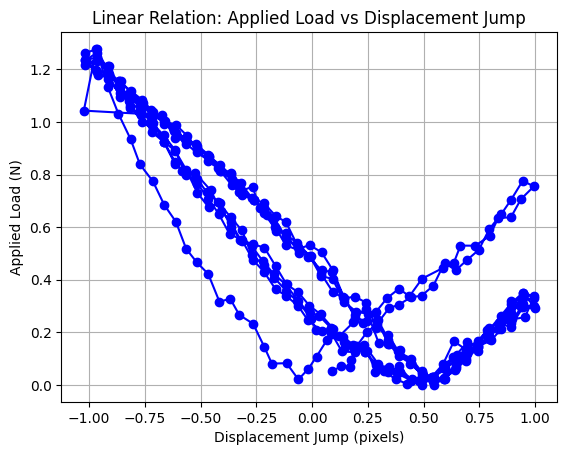

In [12]:
plt.plot(data["Applied Load (N)"], data["Displacement Jump (pixels)"], "bo-")
plt.grid(True)
plt.xlabel('Displacement Jump (pixels)')
plt.ylabel('Applied Load (N)')
plt.title('Linear Relation: Applied Load vs Displacement Jump')

plt.grid(True)
plt.show()

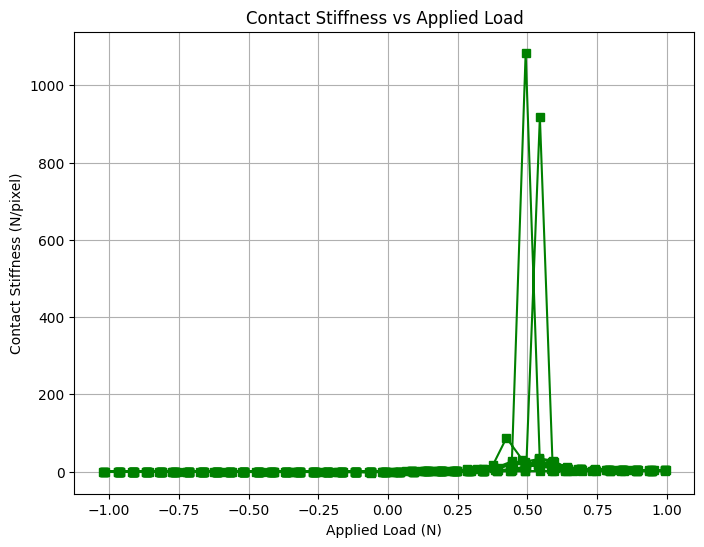

In [13]:
data['Contact Stiffness (N/pixel)'] = data['Applied Load (N)'] / data['Displacement Jump (pixels)']
plt.figure(figsize=(8,6))
plt.plot(data['Applied Load (N)'], data['Contact Stiffness (N/pixel)'], 'gs-')
plt.xlabel('Applied Load (N)')
plt.ylabel('Contact Stiffness (N/pixel)')
plt.title('Contact Stiffness vs Applied Load')
plt.grid(True)
plt.show()


/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_37342/3797879806.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('DIC_Data/Tangential/R1_CAFS13_DICResults/CAFS0013_load.lvm', delim_whitespace=True, header=None, names=['Timestamp', 'TangDisplacement', 'Load'])


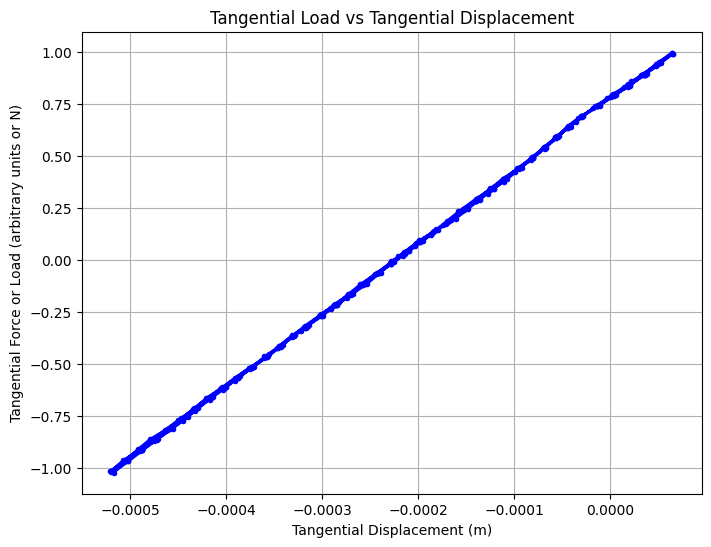

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('DIC_Data/Tangential/R1_CAFS13_DICResults/CAFS0013_load.lvm', delim_whitespace=True, header=None, names=['Timestamp', 'TangDisplacement', 'Load'])
# Or, if comma-separated: pd.read_csv('...', names=[...])

plt.figure(figsize=(8,6))
plt.plot(data['TangDisplacement'], data['Load'], 'b.-')
plt.xlabel('Tangential Displacement (m)')
plt.ylabel('Tangential Force or Load (arbitrary units or N)')
plt.title('Tangential Load vs Tangential Displacement')
plt.grid(True)
plt.show()
